<a href="https://colab.research.google.com/github/psyuktha/insurance/blob/main/own_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

insurance= pd.read_csv("/archive.zip")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[:5], y_train[:5],len(X_train_normal[0])

(array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
 Name: charges, dtype: float64,
 11)

In [ ]:
df=pd.DataFrame(X_train_normal)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pd.DataFrame(y_train)

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [ ]:
age = np.array(insurance['age'])

age_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
age_normalizer.adapt(age)
age

array([19, 18, 28, ..., 18, 21, 61])

In [ ]:
from sklearn.model_selection import train_test_split

age_train,age_test,y_train,y_test=train_test_split(age,y,test_size=0.2,random_state=42)

In [ ]:
tf.random.set_seed(42)

age_model =tf.keras.Sequential([

    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

age_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

age_model.fit(tf.expand_dims(age_train, axis=-1), y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13313.4971 - mae: 13313.4971
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13218.3008 - mae: 13218.3008
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13046.0664 - mae: 13046.0664
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12719.2656 - mae: 12719.2656
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12151.9238 - mae: 12151.9238
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11242.4844 - mae: 11242.4844
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 9941.2246 - mae: 9941.2246
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8430.9180 - mae: 8430.9180
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7280.5625 - mae: 7280.5625
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6999.4331 - ma

In [ ]:
d=age_model.predict(age_test)


9/9 [==============================] - 0s 2ms/step


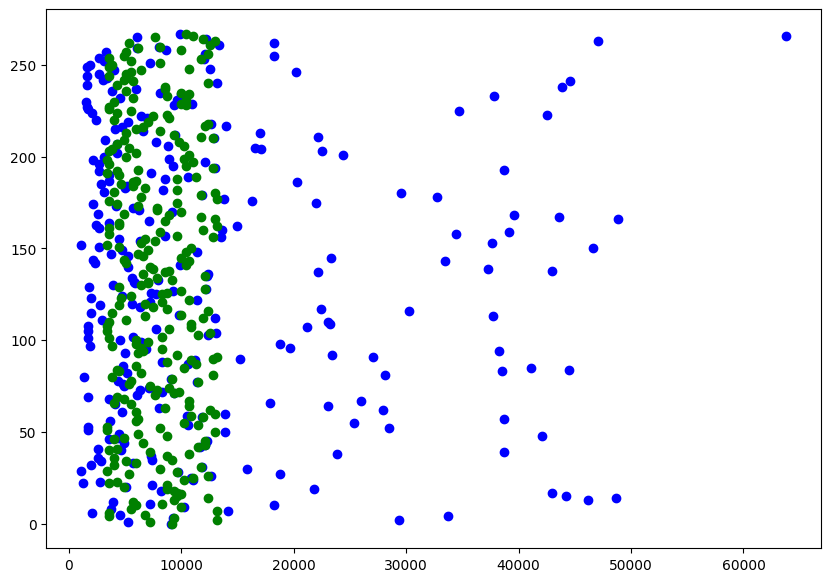

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(y_test,[i for i in range(len(y_test))],c="b",label="training data")
plt.scatter(d,[i for i in range(len(d))],c="g",label="predicted data")



def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
tf.random.set_seed(42)

insurance_model =tf.keras.Sequential([

    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics = ["mae"])

history=insurance_model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=500,verbose=0)


In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8645.6035 - mae: 8645.6035


[8645.603515625, 8645.603515625]

In [ ]:
a=insurance_model.predict(X_test_normal)#.flatten()
#b=pd.DataFrame(a)
#len(a),len(y_test),a

9/9 [==============================] - 0s 5ms/step


In [ ]:
#c=[sum(a[i])/len(a[i]) for i in range len(a)]
c=[]
for i in a:
  c.append(np.median(i))

y_reg_preds = model_2.predict(X_reg_test)

plt.scatter(X_reg_train,y_reg_train, c="b" , label="Training Data")
plt.scatter(X_reg_test,y_reg_test, c="g" , label="Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r" , label="Predicted Data")
plt.legend()

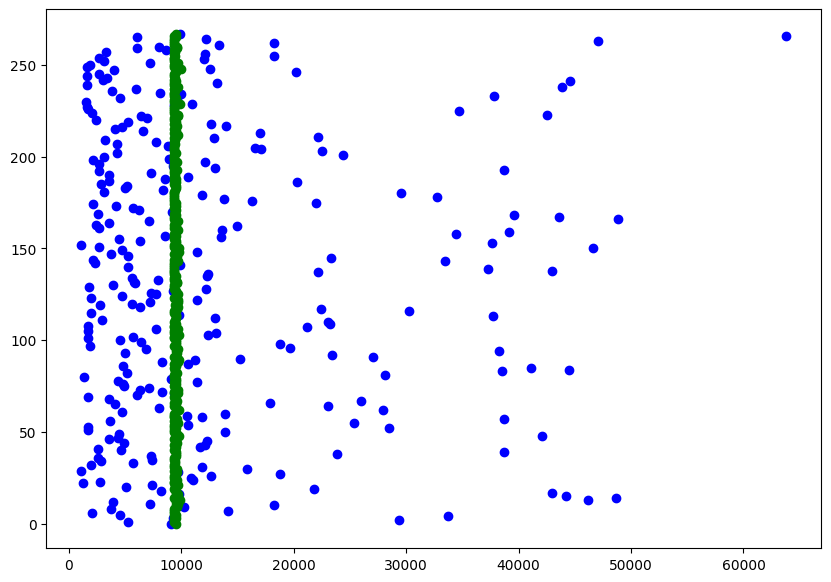

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(y_test,[i for i in range(len(y_test))],c="b",label="training data")
plt.scatter(c,[i for i in range(len(c))],c="g",label="predicted data")



In [ ]:
insurance_model.predict(X_test_normal)

9/9 [==============================] - 0s 9ms/step


array([[[ 9865.427],
        [ 9568.222],
        [ 9701.539],
        ...,
        [ 9350.898],
        [ 9350.898],
        [ 9350.898]],

       [[ 9693.916],
        [ 9682.482],
        [ 9350.898],
        ...,
        [10227.497],
        [ 9350.898],
        [ 9350.898]],

       [[10227.497],
        [ 9608.55 ],
        [ 9350.898],
        ...,
        [10227.497],
        [ 9350.898],
        [ 9350.898]],

       ...,

       [[ 9732.029],
        [ 9635.436],
        [ 9526.221],
        ...,
        [ 9350.898],
        [ 9350.898],
        [ 9350.898]],

       [[10036.934],
        [10092.6  ],
        [ 9350.898],
        ...,
        [ 9350.898],
        [10227.497],
        [ 9350.898]],

       [[ 9979.762],
        [ 9781.064],
        [ 9526.221],
        ...,
        [ 9350.898],
        [ 9350.898],
        [10227.497]]], dtype=float32)

In [ ]:
c

[array([9490.032], dtype=float32),
 array([9458.313], dtype=float32),
 array([9494.057], dtype=float32),
 array([9506.191], dtype=float32),
 array([9436.606], dtype=float32),
 array([9492.604], dtype=float32),
 array([9419.358], dtype=float32),
 array([9514.267], dtype=float32),
 array([9423.113], dtype=float32),
 array([9516.038], dtype=float32),
 array([9480.017], dtype=float32),
 array([9494.034], dtype=float32),
 array([9460.785], dtype=float32),
 array([9536.645], dtype=float32),
 array([9513.868], dtype=float32),
 array([9518.239], dtype=float32),
 array([9528.062], dtype=float32),
 array([9500.37], dtype=float32),
 array([9483.152], dtype=float32),
 array([9462.9375], dtype=float32),
 array([9498.956], dtype=float32),
 array([9500.685], dtype=float32),
 array([9433.818], dtype=float32),
 array([9455.512], dtype=float32),
 array([9516.476], dtype=float32),
 array([9489.866], dtype=float32),
 array([9503.194], dtype=float32),
 array([9486.574], dtype=float32),
 array([9495.608], d

In [ ]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [ ]:
insurance["charges"][846]

9872.701

In [ ]:
c[-1]

array([9501.841], dtype=float32)